In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

from Lineaire.Linear import *
from Lineaire.MSELoss import *
from NonLineaire.Sigmoide import Sigmoide
from Encapsulation.Sequentiel import Sequentiel

from icecream import ic
from src import tools



In [28]:

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# Données de forme (442 exemples, 10 dimensions)
# On récupère une seule dimensions (la N°3), newaxis est fait pour qu'on ait pas un vecteur mais une matrice 442*1
diabetes_X = diabetes_X[:, np.newaxis, 2]

# scaler = StandardScaler()
# diabetes_y = np.reshape(diabetes_y, (-1,1))
# dataset_diabetes = scaler.fit_transform(np.hstack((diabetes_X, diabetes_y)))

# diabetes_X=dataset_diabetes[:-1]
# diabetes_y=dataset_diabetes[-1]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = np.reshape(diabetes_y[:-20], (-1,1))
diabetes_y_test = np.reshape(diabetes_y[-20:], (-1,1))

dim_input = diabetes_X_train.shape[1] #==1, pour faire de la régression 2D
dim_output = 1  #len(diabetes_y_train.shape) == 1

In [29]:
scaler = StandardScaler()
diabetes_X_train = scaler.fit_transform(diabetes_X_train)
scaler = StandardScaler()
diabetes_y_train = scaler.fit_transform(diabetes_y_train)
scaler = StandardScaler()
diabetes_X_test = scaler.fit_transform(diabetes_X_test)
scaler = StandardScaler()
diabetes_y_test = scaler.fit_transform(diabetes_y_test)

     name  input_dim  output_dim
0  Linear          1           1
     name              parametres gradient
0  Linear  [[-6.428859903569256]]  [[0.0]]


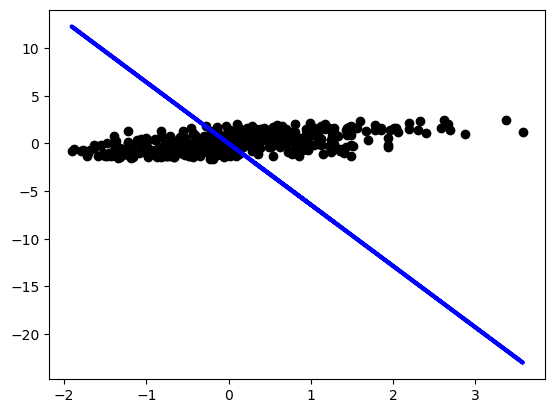

In [14]:
diabetes_y_train = np.reshape(diabetes_y_train, (-1,1))
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")

couche_lineaire = Linear(dim_input, dim_output)
sigmoide = Sigmoide()

couche_lineaire.describe_shape()
couche_lineaire.describe_values()

net = Sequentiel(couche_lineaire, )

output = net.forward(diabetes_X_train)
plt.plot(diabetes_X_train, output, color="blue", linewidth=3)

plt.xticks()
plt.yticks()
plt.show()

     name  input_dim  output_dim
0  Linear          1           1
     name              parametres gradient
0  Linear  [[2.1439235413747872]]  [[0.0]]


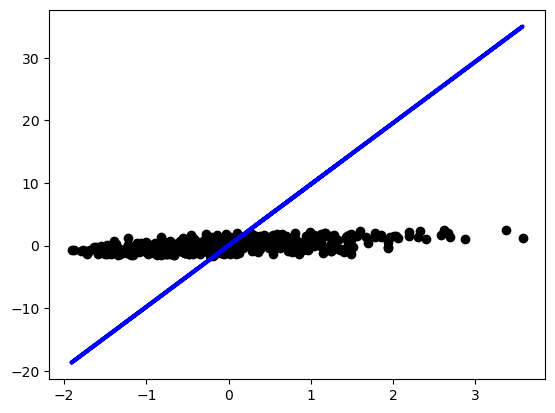

In [40]:
diabetes_y_train = np.reshape(diabetes_y_train, (-1,1))
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
dim_h = 1
couche_lineaire1 = Linear(dim_input, dim_h)
couche_lineaire2 = Linear(dim_h, dim_output)

couche_lineaire1.describe_shape()
couche_lineaire1.describe_values()

net = Sequentiel(couche_lineaire1, couche_lineaire2)

output = net.forward(diabetes_X_train)
plt.plot(diabetes_X_train, output, color="blue", linewidth=3)

plt.xticks()
plt.yticks()
plt.show()

In [5]:
mseloss = MSELoss()
cout = mseloss.forward(diabetes_y_train, output)
print(f"{cout.mean()=}")

gradient_loss = mseloss.backward(diabetes_y_train, output) # le premier delta du backward
print(f"gradient loss p.r aux sorties: {gradient_loss}")

cout.mean()=0.914903971567752
gradient loss p.r aux sorties: [[ 2.06110238e+00]
 [ 2.03271408e+00]
 [ 2.31828037e+00]
 [-1.09491848e+00]
 [ 4.83019093e-01]
 [ 1.46508853e+00]
 [ 3.99679089e-01]
 [ 3.16301246e+00]
 [ 3.12428405e+00]
 [-2.06706155e+00]
 [ 1.35783180e+00]
 [ 4.05208532e+00]
 [-6.43082906e-01]
 [-6.01279358e-04]
 [ 9.52486382e-01]
 [-3.48264160e-01]
 [ 1.66909688e+00]
 [ 1.95713897e+00]
 [ 1.77273100e+00]
 [-2.70470380e-01]
 [ 2.21385294e+00]
 [ 2.76396839e+00]
 [ 2.87889473e+00]
 [-3.76465252e-01]
 [ 1.19690304e+00]
 [-1.02764835e+00]
 [ 4.24314368e-01]
 [ 3.77250192e+00]
 [ 6.47665842e-01]
 [-2.83467980e+00]
 [ 2.62945549e+00]
 [ 2.44701812e+00]
 [-2.86567530e+00]
 [ 1.72166056e+00]
 [ 2.29146127e+00]
 [ 1.34753736e+00]
 [-9.56387194e-01]
 [-1.50885555e+00]
 [-5.57829487e-01]
 [ 3.42946194e+00]
 [ 1.79234961e+00]
 [ 2.55072113e+00]
 [ 2.70625636e+00]
 [ 1.64031890e+00]
 [-7.39371747e-01]
 [ 2.61061424e+00]
 [-6.80018313e-01]
 [ 2.94669920e-01]
 [ 2.03503653e+00]
 [ 2.081

In [8]:
net.zero_grad()
net.backward(diabetes_X_train, delta=gradient_loss)
print(f'gradient: {net.describe_values()}')
#couche_lineaire.backward_delta(diabetes_X_train , delta=gradient_loss)
net.update_parameters(gradient_step=1e-3)
print(f'parametres: {net.describe_values()}')

     noms           parametres               gradients
0  Linear  [7.324027734376962]  [-0.22858627926385916]
1     sig                 None                    None
gradient: None
     noms           parametres gradients
0  Linear  [7.324256320656226]     [0.0]
1     sig                 None      None
parametres: None


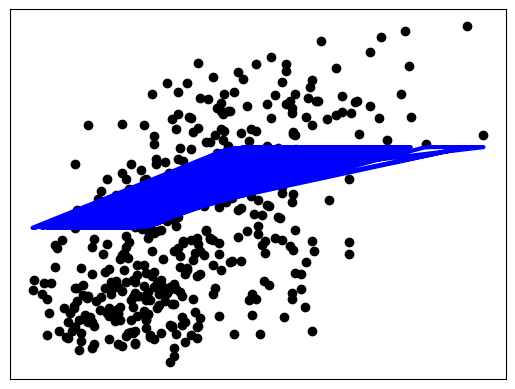

In [9]:
output2 = net.forward(diabetes_X_train)
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.plot(diabetes_X_train, output2, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [10]:
mseloss = MSELoss()
cout = mseloss.forward(diabetes_y_train, output)
print(f"{cout.mean()=}")


cout.mean()=0.914903971567752


# boucle

In [41]:
couts = []
def train(net, nb_iter, eps, print_every=None):
    for i in range(nb_iter):
        output = net.forward(diabetes_X_train)
        
        mseloss = MSELoss()
        cout = mseloss.forward(diabetes_y_train, output)
        couts.append(cout.mean())
        if (print_every is not None) and (i % print_every == 0):
            print(cout)
            #net.describe_values()
            print('###################')
        
        gradient_loss = mseloss.backward(diabetes_y_train, output) # le premier delta du backward
        # net.zero_grad()
        #couche_lineaire.backward_update_gradient(diabetes_X_train, delta=gradient_loss)
        net.backward(diabetes_X_train, delta=gradient_loss)
        net.update_parameters(gradient_step=eps)
    return net

In [42]:
couts=[]
net = train(net, nb_iter=10, eps=1e-1, print_every=100)

[1.59702950e+02 9.37137164e+01 8.49353025e+01 1.00326156e+01
 5.40432421e+01 6.00076901e+01 9.23458168e+01 4.67970141e-01
 1.73421352e+02 3.49891290e+01 2.78081865e+02 2.11705555e+01
 4.05557914e+01 8.05907369e-01 2.41241081e+01 1.63640683e+01
 7.13690633e+01 6.34557404e+00 2.34776013e+00 1.60508858e+01
 1.14479466e+02 1.12304866e+01 3.07589235e-02 1.25365139e+02
 4.73759746e+01 1.11389359e+01 2.49985517e+02 1.70282189e+02
 1.75765276e+01 9.33975518e+00 8.78273108e+01 1.52727809e+02
 5.41406749e+02 9.24335250e+01 1.43813581e+02 3.38009966e+01
 1.00461508e+01 3.42977240e-01 1.77562644e+02 1.34180039e+01
 1.27072426e+00 1.62570656e+02 1.13524241e+00 1.70622731e+01
 1.57972079e+02 3.67999071e+01 8.76148371e+00 2.24640513e+02
 5.90308821e+01 8.93320403e+00 2.61933892e+00 5.55343334e+00
 6.68485717e-01 7.46755251e+00 2.19922234e+01 9.84835896e+01
 9.41708487e+01 1.35238116e+02 1.84295768e+02 3.12016381e+01
 7.08313680e-02 9.32164328e-01 8.00761455e-02 5.59891234e+01
 1.85093144e+01 2.780607

c:\_TME\Projet-ML\Lineaire\MSELoss.py:15: RuntimeWarning: overflow encountered in square
  return np.sum((y-yhat)**2, axis=1)
c:\_TME\Projet-ML\Lineaire\Linear.py:44: RuntimeWarning: invalid value encountered in subtract
  self._parameters -= gradient_step*self._gradient


In [46]:
net._modules

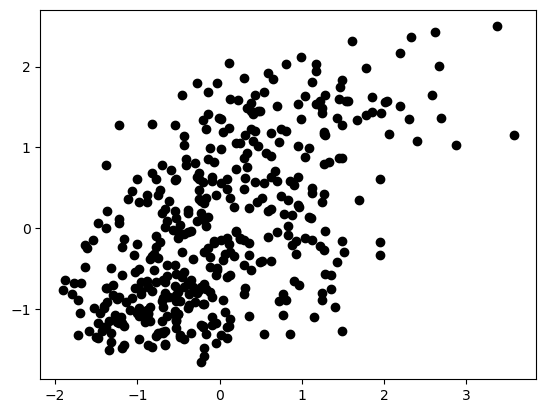

In [43]:
output2 = net.forward(diabetes_X_train)
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.plot(diabetes_X_train, output2, color="blue", linewidth=3)

plt.xticks()
plt.yticks()
plt.show()


In [27]:
mseloss = MSELoss()
cout = mseloss.forward(diabetes_y_train, output)
print(f"{cout.mean()=}")


cout.mean()=6459.963194633774
